# <center> Дескретные распределения

Равномерное распределение — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от 1 до N, а вероятности их появления одинаковы.

$Ex = \frac{N+1}{2} = \frac{6+1}{2} = 3.5$

$\sigma_X = \sqrt{\frac{N^2 - 1}{12}} = \sqrt{\frac{6^2 - 1}{12}} \approx 1.7$

Также мы можем определить ряд распределения для дискретного равномерного распределения с помощью Python. Импортируем библиотеку numpy и функцию randint() из библиотеки scipy, предназначенную для моделирования равномерного дискретного распределения:

In [1]:
import numpy as np
from scipy.stats import randint

In [2]:
# Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно

# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого $X_i$ вероятность того, что случайная величина примет значение $X_i$ или меньше:

In [3]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


### Пример
Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


*Распределение Бернулли*, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями $p$ и $1-p$ соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

Распределение Бернулли формально описывается следующим образом:

$P(X = x)= \left\{\begin{matrix} p & x = 1\\ 1 - p & x = 0 \\ \end{matrix}\right.$

Для этого распределения также известны математическое ожидание

$EX = 1 \cdot p + 0 \cdot (1-p) = p$

и стандартное отклонение

$\sigma_X = \sqrt{p(1-p)}$

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

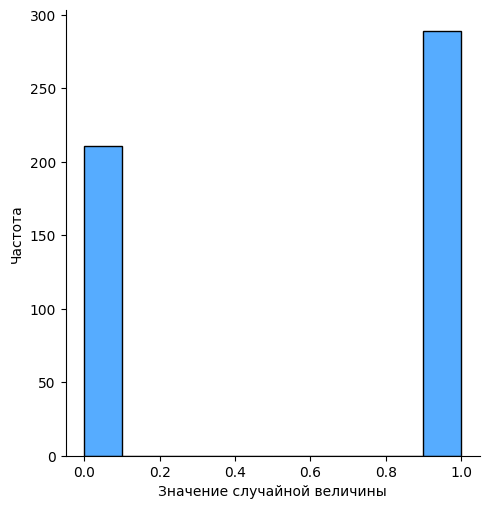

In [5]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [6]:
# Количество неудач и попаданий в модели
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0 211]
 [  1 289]]


*Биномиальным называют распределение*, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Параметры биномиального распределения — $n$ и $P$, где $n$ — общее количество испытаний, а $P$ — вероятность успеха в каждом испытании.

Для того чтобы оценить вероятность, что среди $n$ испытаний будет $P$ успехов, используют следующую формулу:

$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$

$\begin{pmatrix} n \\ k \end{pmatrix} $ называют биномиальным коэффициентом, и он вычисляется следующим образом:

$\frac{n!}{k! (n-k)!}$

Математическое ожидание биномиального распределения равно:

$EX=np$

Стандартное отклонение:

$\sigma_X = \sqrt{np (1-p)}$

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

In [7]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

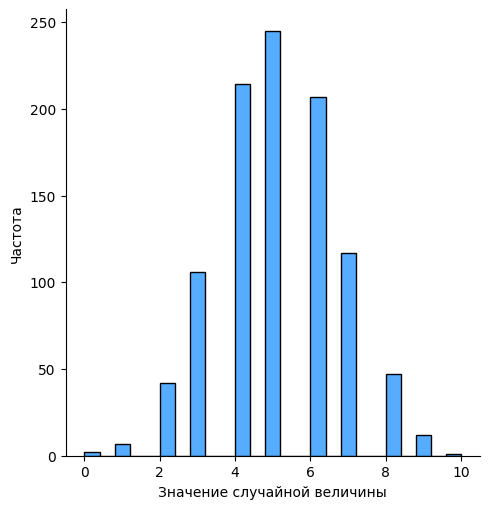

In [8]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

*Распределение Пуассона* — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

В распределении Пуассона значение случайной величины может быть любым неотрицательным числом.  Случайная величина будет обладать следующими характеристиками:

$EX  = \lambda$

$\sigma_X = \sqrt{\lambda}$

где $\lambda$ — ожидаемое число событий за период времени.

Чтобы рассчитать вероятность того, что за период времени произойдёт  событий, можно пользоваться следующей формулой:

$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?

In [9]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)


0.17082685848611215

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой $\lambda = 3$:

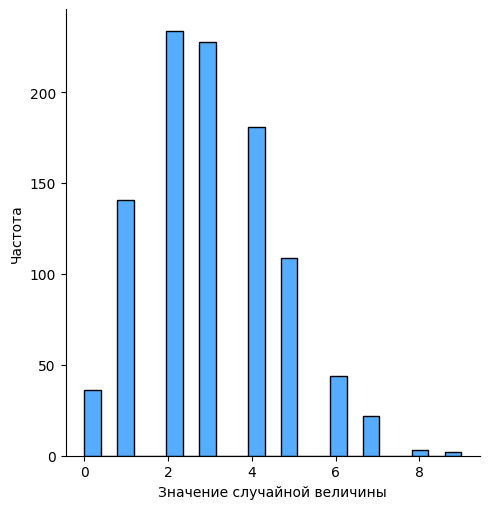

In [10]:
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [12]:
import scipy

scipy.stats.distributions.poisson.pmf(16, 16)

0.09921753162215541

# Непрерывные распределение
- Равномерное
- Нормальное
- Экспоненциальное

*Непрерывная случайная величина $X$ распределяется равномерно*, если вероятность попадания $X$ в интервал пропорциональна длине этого интервала. То есть, к примеру, если мы рассматриваем все числа от 1 до 100 и ищем вероятность попадания в интервал от 1 до 10, то вероятность равна 0.1, а для интервала от 1 до 30 — 0.3.

Случайная величина, которая распределена по непрерывному равномерному закону, может принимать в качестве значения любое вещественное число в заданном отрезке от $a$ до $b$ и имеет следующее математическое ожидание и среднеквадратичное отклонение:

$EX = \frac{a+b}{2}$

$\sigma_X = \frac{b-a}{\sqrt{12}}$

Ранее мы говорили, что для того, чтобы найти вероятность попадания в какой-то интервал, необходимо использовать плотность распределения. Здесь она постоянна и имеет следующий вид:
Это значит, что для любых точек вне рассматриваемого интервала вероятность попасть в него равна нулю, а для точек внутри интервала вероятность равна $1/(b-a)$. Для примера, рассмотренного ранее, вероятность попасть в единичный интервал из промежутка от 4 до 8 равна $1/(8-4) = 0.25$.

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами $a=10$ и $b=40$:

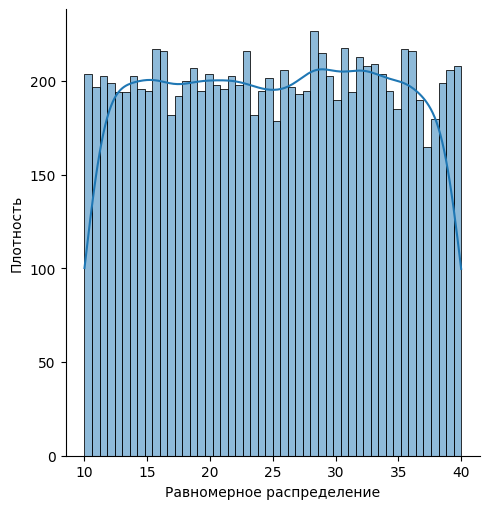

In [13]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

*Нормальное распределение (его ещё называют гауссовским или распределением Гаусса)* представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

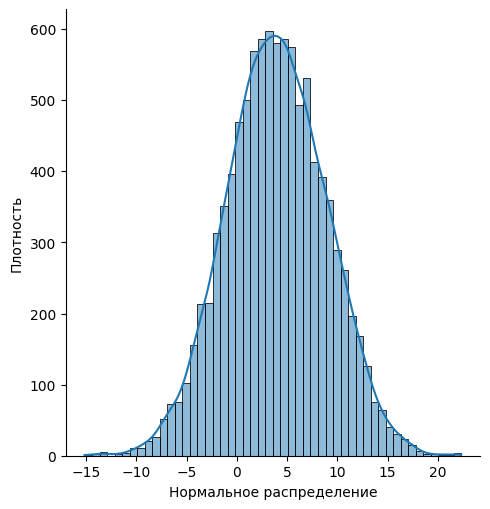

In [14]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

Чем это может быть полезно? Допустим, нам нужно сравнить результаты тестирования двух групп студентов, которые сдавали разные экзамены на знание английского языка, TOEFL и IELTS. Первый экзамен оценивается по шкале от 0 до 120, а второй — от 0 до 9. Как сравнить результаты, измеренные в разных единицах, между собой? Здесь нам и помогает стандартизированное распределение. Если мы переведём оценки обеих групп студентов в так называемые z-оценки, то сможем сравнить результаты между группами. 

In [15]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


*Экспоненциальное распределение* — это распределение вероятностей времени между событиями в процессе Пуассона.

В реальной жизни интервалы времени между событиями обычно разные. Например, если мы анализируем количество поступающих на рабочую почту писем, то оно может быть разным в зависимости от дня и времени суток. Но если мы возьмём небольшой временной интервал, в течение которого скорость примерно постоянная, например с 10:30 до 14:30 в понедельник, экспоненциальное распределение можно использовать как хорошую приблизительную модель для времени до поступления следующего письма.

Плотность распределения

$f(x) = \left\{\begin{matrix} 0, & x < 0 \\ \lambda e^{- \lambda x}, & x \geq 0 \\ \end{matrix}\right.$

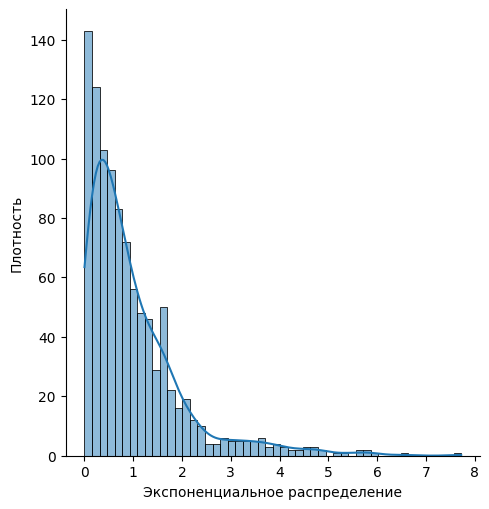

In [16]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')